In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from np_extractor import extract_NPs, definition_NPs

In [3]:
import random
from collections import defaultdict

In [4]:
import requests
import json

def smallworldscore(word):
    url = f"https://smallworldofwords.org/search/en/dictionary/all/{word}/click"
    word_stats = json.loads(requests.get(url).text)
    return word_stats

In [17]:
class WordTable():

    def __init__(self, category, wordlist):
        self.category = category
        self.score = defaultdict(int)
        for word in wordlist:
            self.score[word] = 0

        self.SWS = self.buildSWS()
        self.DEF = self.buildDefinition()
        
    def resetScore(self):
        self.score = self.score.fromkeys(self.score, 0)

    def buildSWS(self):
        SWS = defaultdict(lambda: defaultdict(int))
        for word in self.score:
            sws_tree = smallworldscore(word)
            forward = sws_tree['forward']
            backward = sws_tree['backward']

            for score in forward + backward:
                SWS[word][score['word']] = score['freq']/100

        return SWS
            
    def assocScore(self, related_word):
        for word in self.score:
            self.score[word] += self.SWS[word][related_word]

    def buildDefinition(self):
        DEF = {}
        for word in self.score:
            definition, NPs = definition_NPs(self.category, word)
            DEF[word] = {"definition" : definition, "NPs" : NPs}

        return DEF

    def sentenceScore(self, description):
        
        definition, des_NPs = extract_NPs(description)
        print(des_NPs)

        for word in self.score:
            NPs = self.DEF[word]["NPs"]
            print(NPs)
            for des_NP in des_NPs:
                if des_NP in NPs:
                    self.score[word] += 1

    def plot(self, size = 5):
        np_values = np.array(list(self.score.values()))
        np_keys = np.array(list(self.score.keys()))

        np_values = np_values.reshape(size, size)
        np_keys = np_keys.reshape(size, size)

        ax = plt.figure(figsize=(10, 7))
        df = pd.DataFrame(np_values)
        annot = [["{}\n{}".format(np_keys[i][j], np_values[i][j]) for j in range(size)] for i in range(size)]
        ax = sns.heatmap(df, annot=annot, fmt ='', annot_kws={'size' : 10})

In [18]:
wordtable = WordTable("animals", ['rabbit', 'dog', 'cat', 'frog'])

[[('furry', 'JJ')], [('the', 'DT'), ('ground', 'NN')]]
[[('A', 'DT'), ('rabbit', 'NN')], [('a', 'DT'), ('small', 'JJ'), ('furry', 'NN'), ('animal', 'NN')], [('long', 'JJ'), ('ears', 'NNS')], [('Rabbits', 'NNS')], [('pets', 'NNS')], [('live', 'JJ'), ('wild', 'NN')], [('holes', 'NNS')], [('the', 'DT'), ('ground', 'NN')]]
[[('A', 'DT'), ('dog', 'NN')], [('a', 'DT'), ('very', 'RB'), ('common', 'JJ'), ('four-legged', 'JJ'), ('animal', 'NN')], [('people', 'NNS')], [('a', 'DT'), ('pet', 'NN')], [('many', 'JJ'), ('different', 'JJ'), ('breeds', 'NNS')], [('dog', 'NN')]]
[[('A', 'DT'), ('cat', 'NN')], [('a', 'DT'), ('furry', 'NN'), ('animal', 'NN')], [('a', 'DT'), ('long', 'JJ'), ('tail', 'NN')], [('sharp', 'JJ'), ('claws', 'NN')], [('Cats', 'NNS')], [('pets', 'NNS')]]
[[('A', 'DT'), ('frog', 'NN')], [('a', 'DT'), ('small', 'JJ'), ('creature', 'NN')], [('smooth', 'JJ'), ('skin', 'NN')], [('big', 'JJ'), ('eyes', 'NNS')], [('back', 'RB'), ('legs', 'NN')], [('Frogs', 'NNP')], [('near', 'JJ'), ('wat

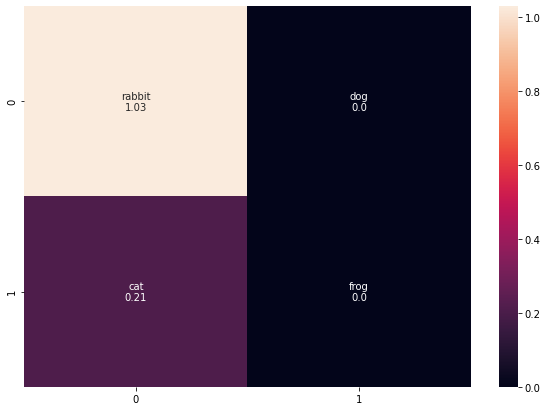

In [22]:
## When description is "It is furry and it lives in the ground."

wordtable.resetScore()

wordtable.assocScore('furry')
wordtable.assocScore('ground')

wordtable.sentenceScore("It is furry, and it lives in the ground.")

wordtable.plot(size = 2)
